## III Logistic Regression

### Q.1 Using the make_blobs function in sklearn generate a dataset of 100 points with two classes. Implement Logistic regression with cross entropy loss.

In [20]:
# Importing libraries and important modules
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from math import log

In [21]:
# Using the make_blobs function in sklearn to generate a dataset of 100 points with two classes
X, y = make_blobs(n_samples = 100, centers = 2, cluster_std = 1, n_features = 2)

In [22]:
# Defining the Logistic Regression Class
class LogisticRegression() :
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate        
        self.iterations = iterations
    # Cross Entropy Loss 
    def loss(self, h, y):
        return (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))/len(y)
    # Model Training  
    def fit(self, X, Y):        
        # No. of Training Examples, No. of Features given by X.shape      
        self.m, self.n = X.shape        
        # Weight Initialization        
        self.W = np.zeros(self.n)        
        self.b = 0        
        self.X = X        
        self.Y = Y
        # Gradient Descent Learning
        cost_list=[]
        # To store the costs in a list after each weight updation
        for i in range(self.iterations):
            cost_list.append(self.update_weights())
        return cost_list
      
    # Updation of Weights during Gradient Descent 
    def update_weights(self):
        A = 1/(1 + np.exp(-(self.X.dot(self.W) + self.b))) #Sigmoid Activation Function
        # Gradients Calculation (Derivative of Loss Function with respect to weights)
        p = ( A - self.Y.T )        
        p = np.reshape(p, self.m)     
        dW = np.dot(self.X.T, p)/self.m         
        db = np.sum(p)/self.m 
        # Updation of Weights
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
        return self.loss(A,self.Y)
    
    # Prediction on Dataset X; if result from Sigmoid Activation Function is greater than 0.5, result is 1 else 0
    def predict(self, X):
        Z = 1/( 1 + np.exp(-(X.dot(self.W) + self.b)))        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y 
    # Defining the F1 Score (2PR/P+R)
    def F1_score(self,y,y_pred):
        tp,tn,fp,fn = 0,0,0,0 # True Positive, True Negative, False Positive, False Negative
        for i in range(len(y)):
            if y[i] == 1 and y_pred[i] == 1:
                tp += 1
            elif y[i] == 1 and y_pred[i] == 0:
                fn += 1
            elif y[i] == 0 and y_pred[i] == 1:
                fp += 1
            elif y[i] == 0 and y_pred[i] == 0:
                tn += 1
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1_score = 2*precision*recall/(precision+recall)
        return f1_score
    

In [23]:
# Splitting the Dataset into Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Using the above defined Logistic Regression class for Model Training    
model_LR = LogisticRegression(learning_rate = 0.01, iterations = 100)
Cost = model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)
f1score = model_LR.F1_score(y_test,y_pred)

In [24]:
# Accuracy Calculation
count = 0    
cc=0
for count in range(np.size(y_pred)):
    if y_test[count] == y_pred[count]:
        cc=cc+1
    count=count+1
accuracy = (cc/count) * 100
print("Accuracy of the Logistic Regression Model on Test Set (%) :", accuracy)
print("F1 Score of the Logistic Regression Model on Test Set:", f1score)

Accuracy of the Logistic Regression Model on Test Set (%) : 100.0
F1 Score of the Logistic Regression Model on Test Set: 1.0


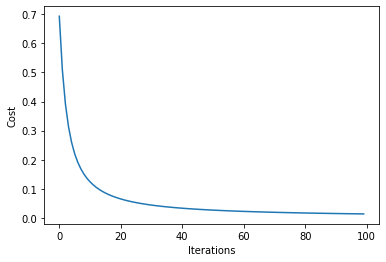

In [25]:
# Plot of the Cost Function for every iteration
xpoints = np.arange(0,100,1)
plt.plot(xpoints,Cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

### Observations:

1. The make_blobs function in sklearn has been used to generate a dataset of 100 points with two classes.
2. The Loss Function used in the Logistic Regression Model is the Cross Entropy Loss.
3. Cross Entropy Loss: L = (-ylog(h) - (1 - y)log(1 - h))/m where m is the number of training examples.
4. The Gradients are computed through calculation of derivative of loss Function with respect to weights and the Weights, Bias are suitably updated using an input learning rate.
5. During prediction, the sigmoid activation function is applied to W*X+B. 
6. If result from sigmoid activation function is greater than 0.5, a value of 1 is outputted else 0 is outputted.
7. The Dataset is split into Training set(75%) and Test set(25%). The Logistic Regression Model is fit on the Training Dataset with an input learning rate=0.01 and run for 100 iterations.
8. The Accuracy and F1-score on the Test set from the Logistic Regression Model  is outputted.
7. A Plot of the Cost function vs Iteration is shown above. We can observe that the Cost gradually decreases as number of iterations increases. 
8. We observe that as the estimated weights and bias approach the true values,the loss reduces with each iteration increase.

### References:

1. https://www.analyticsvidhya.com/blog/2022/02/implementing-logistic-regression-from-scratch-using-python/
2. https://www.geeksforgeeks.org/implementation-of-logistic-regression-from-scratch-using-python/